# Linearization

$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE3093: Automatic control, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_

### Linear approximations of trigonometric functions (around $t=0$)

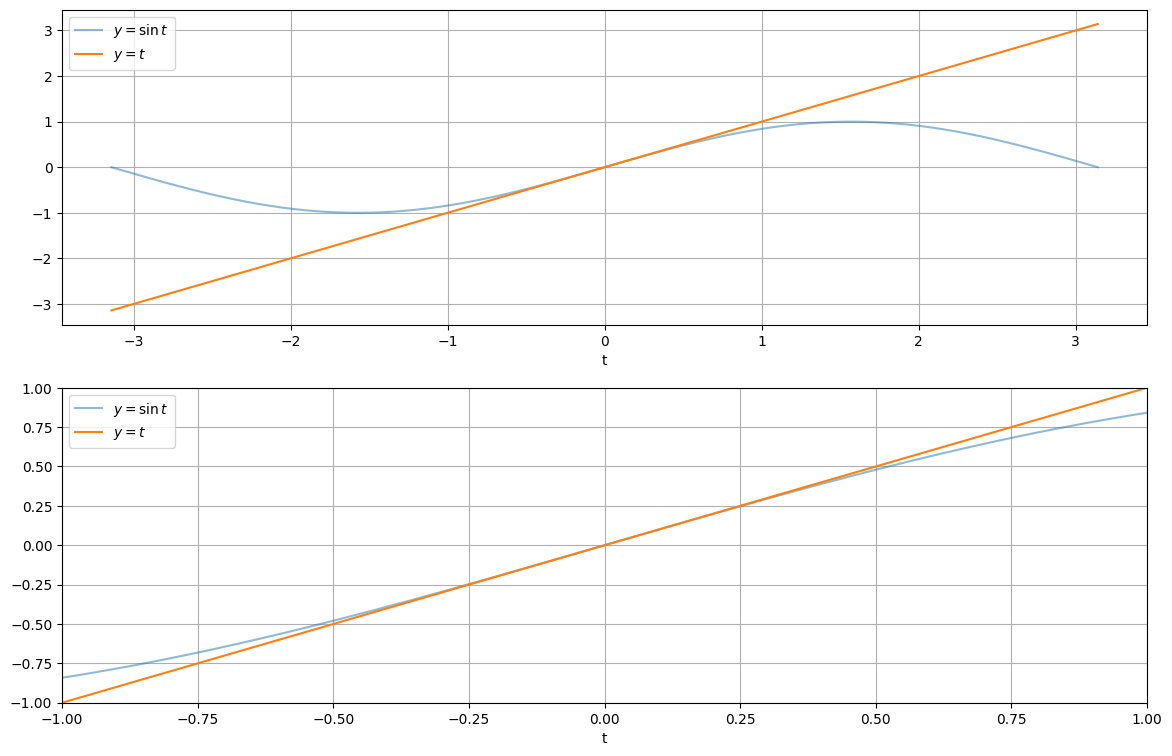

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-np.pi,np.pi,1000)
y1 = np.sin(t)
y2 = t
plt.figure(figsize=(14,9), dpi=100)
plt.subplot(211)
plt.plot(t,y1, alpha=0.5, label=r'$y=\sin t$')
plt.plot(t,y2, label=r'$y=t$')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(t,y1, alpha=0.5, label=r'$y=\sin t$')
plt.plot(t,y2, label=r'$y=t$')
plt.xlabel('t')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.legend()
plt.grid()
plt.show()

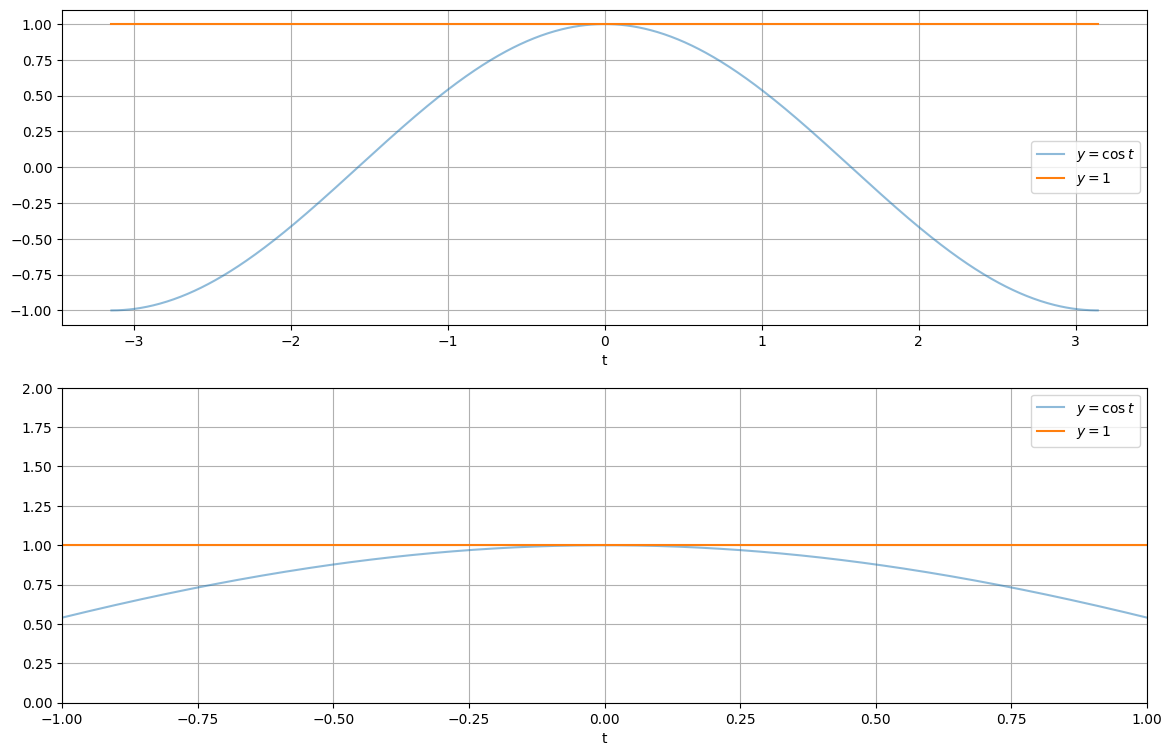

In [2]:
t = np.linspace(-np.pi,np.pi,1000)
y1 = np.cos(t)
y2 = np.ones(len(t))
plt.figure(figsize=(14,9), dpi=100)
plt.subplot(211)
plt.plot(t,y1, alpha=0.5, label=r'$y=\cos t$')
plt.plot(t,y2, label=r'$y=1$')
plt.xlabel('t')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(t,y1, alpha=0.5, label=r'$y=\cos t$')
plt.plot(t,y2, label=r'$y=1$')
plt.xlabel('t')
plt.xlim(-1,1)
plt.ylim(0,2)
plt.legend()
plt.grid()
plt.show()

### Linearized dynamics of a simple bar pendulum (with friction)

* Nonlinear dynamics
$$
\begin{align*}
\frac{1}{3}ml^2\ddot{\theta} &= -\frac{1}{2}mgl\sin\theta - b \dot\theta
\end{align*}
$$

* Linearized dynamics ($\delta=\theta - \theta_0$ linearized around $\theta_0=0$)
$$
\begin{align*}
\frac{1}{3}ml^2\ddot{\delta} &= -\frac{1}{2}mgl\delta - b \dot\delta
\end{align*}
$$


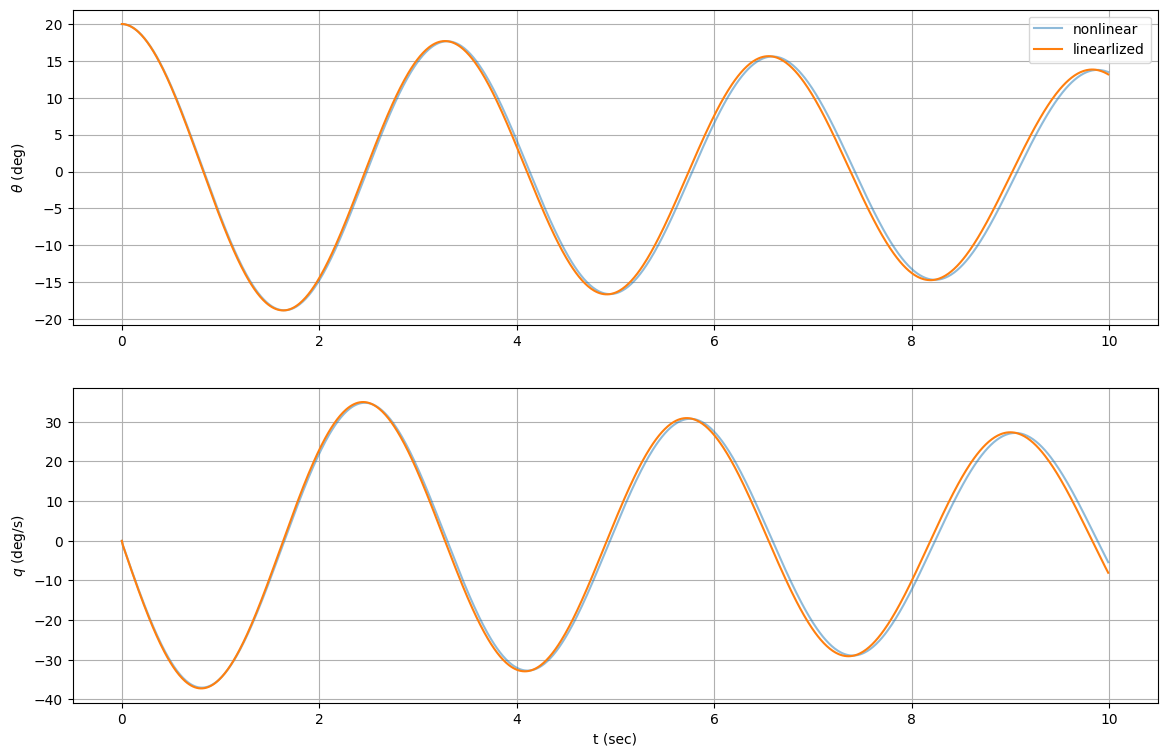

In [3]:
Rad2Deg = 180/np.pi
theta0 = 20/Rad2Deg
q0 = 0
x0 = np.array([theta0,q0])
u0 = 0

dt = 0.01
tf = 10
n = int(tf/dt)
m = 1
l = 2
g = 9.8
b = 0.1
t = np.arange(0, 10, dt)

X = np.zeros((2,n))
U = u0*np.ones(n-1)
X[:,0] = x0

Xdot_p = 0

for k in range(n-1):
    theta, q = X[:,k]
    #################################
    # controller
    u = 0
    #################################
    U[k] = u
    thetadot = q
    qdot = ( -0.5*m*g*np.sin(theta) -b*q +u)/(m*l*l/3)
    Xdot = np.array([thetadot,qdot])
    X[:,k+1] = X[:,k] + 0.5*(3*Xdot-Xdot_p)*dt
    Xdot_p = Xdot

X_n = np.copy(X)

X = np.zeros((2,n))
U = u0*np.ones(n-1)
X[:,0] = x0

Xdot_p = 0

for k in range(n-1):
    theta, q = X[:,k]
    #################################
    # controller
    u = 0
    #################################
    U[k] = u
    thetadot = q
    qdot = ( -0.5*m*g*theta -b*q +u)/(m*l*l/3)
    Xdot = np.array([thetadot,qdot])
    X[:,k+1] = X[:,k] + 0.5*(3*Xdot-Xdot_p)*dt
    Xdot_p = Xdot

X_l = np.copy(X)

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(211)
plt.plot(t,X_n[0,:]*Rad2Deg, alpha=0.5, label='nonlinear')
plt.plot(t,X_l[0,:]*Rad2Deg, label='linearlized')
plt.ylabel(r'$\theta$ (deg)')
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(t,X_n[1,:]*Rad2Deg, alpha=0.5, label='nonlinear')
plt.plot(t,X_l[1,:]*Rad2Deg, label='linearlized')
plt.xlabel('t (sec)')
plt.ylabel(r'$q$ (deg/s)')
plt.grid()
plt.show()

### Linearized dynamics of an inverted bar pendulum (with friction)

* Nonlinear dynamics
$$
\begin{align*}
\frac{1}{3}ml^2\ddot{\theta} &= -\frac{1}{2}mgl\sin\theta - b \dot\theta
\end{align*}
$$

* Linearized dynamics ($\delta=\theta-\theta_0$ linearized around $\theta_0=\pi$)
$$
\begin{align*}
\frac{1}{3}ml^2\ddot{\delta} &= \frac{1}{2}mgl\delta - b \dot\delta
\end{align*}
$$


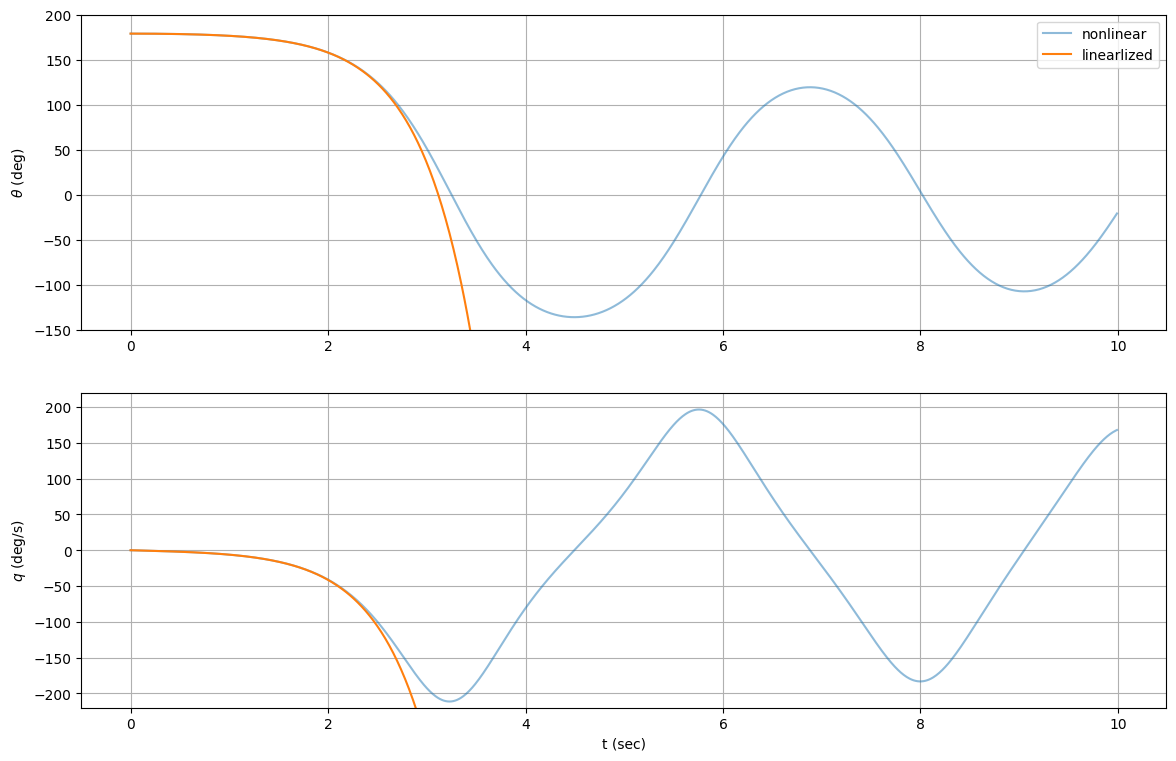

: 

In [ ]:
Rad2Deg = 180/np.pi
theta0 = 179/Rad2Deg
q0 = 0
x0 = np.array([theta0,q0])
u0 = 0

dt = 0.01
tf = 10
n = int(tf/dt)
m = 1
l = 2
g = 9.8
b = 0.1
t = np.arange(0, 10, dt)

X = np.zeros((2,n))
U = u0*np.ones(n-1)
X[:,0] = x0

Xdot_p = 0

for k in range(n-1):
    theta, q = X[:,k]
    #################################
    # controller
    u = 0
    #################################
    U[k] = u
    thetadot = q
    qdot = ( -0.5*m*g*np.sin(theta) -b*q +u)/(m*l*l/3)
    Xdot = np.array([thetadot,qdot])
    X[:,k+1] = X[:,k] + 0.5*(3*Xdot-Xdot_p)*dt
    Xdot_p = Xdot

X_n = np.copy(X)

theta0 = -1/Rad2Deg
q0 = 0
x0 = np.array([theta0,q0])
X = np.zeros((2,n))
U = u0*np.ones(n-1)
X[:,0] = x0

Xdot_p = 0

for k in range(n-1):
    theta, q = X[:,k]
    #################################
    # controller
    u = 0
    #################################
    U[k] = u
    thetadot = q
    qdot = ( 0.5*m*g*theta -b*q +u)/(m*l*l/3)
    Xdot = np.array([thetadot,qdot])
    X[:,k+1] = X[:,k] + 0.5*(3*Xdot-Xdot_p)*dt
    Xdot_p = Xdot

X_l = np.copy(X)

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(211)
plt.plot(t,X_n[0,:]*Rad2Deg, alpha=0.5, label='nonlinear')
plt.plot(t,180+X_l[0,:]*Rad2Deg, label='linearlized')
plt.ylabel(r'$\theta$ (deg)')
plt.ylim(-150,200)
plt.legend()
plt.grid()
plt.subplot(212)
plt.plot(t,X_n[1,:]*Rad2Deg, alpha=0.5, label='nonlinear')
plt.plot(t,X_l[1,:]*Rad2Deg, label='linearlized')
plt.xlabel('t (sec)')
plt.ylabel(r'$q$ (deg/s)')
plt.ylim(-220,220)
plt.grid()
plt.show()